In [10]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, f1_score, precision_score, recall_score, roc_curve

# Loading of data file

In [2]:
feat_file=pd.read_csv('cancer_preprocess.csv')

In [3]:
feat_file.head()

,A1_0,A1_1,A1_2,A1_3,A1_4,A1_5,A1_6,A1_7,A1_8,A1_9,...,E5_118,E5_119,E5_120,E5_121,E5_122,E5_123,E5_124,E5_125,E5_126,E5_127
0,0.183793,0.239916,0.850030,0.210690,0.896150,0.866617,0.860076,0.115359,0.374133,0.927302,...,0.793461,0.576311,0.189772,0.784201,0.335585,0.644900,0.301631,0.547792,0.479534,0.308149
1,0.908285,0.882967,0.804499,0.167710,0.854424,0.773797,0.818178,0.146237,0.822128,0.880442,...,0.792318,0.645596,0.668128,0.267654,0.732278,0.791278,0.680896,0.315371,0.368137,0.192646
2,0.187789,0.896291,0.089300,0.872091,0.140625,0.809294,0.833710,0.439762,0.836772,0.120445,...,0.594850,0.744443,0.246511,0.767050,0.736697,0.710731,0.586913,0.777560,0.706049,0.311375
3,0.911319,0.907869,0.831656,0.767504,0.886981,0.589135,0.704022,0.613958,0.852084,0.481431,...,0.593676,0.227899,0.264702,0.535805,0.480239,0.731689,0.799642,0.856727,0.824530,0.582091
4,0.181163,0.800212,0.827693,0.149731,0.739144,0.843704,0.841885,0.127548,0.112236,0.898438,...,0.391759,0.808125,0.147298,0.859803,0.620034,0.734427,0.126441,0.508898,0.552177,0.360427


In [4]:
feat_file.shape

(2129, 3200)

In [5]:
X=feat_file.values

In [6]:
label= pd.read_csv('cancer_label.csv')
label.head()

,Status
0,0
1,0
2,0
3,1
4,0


In [7]:
y=label.values.ravel()

# split


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [9]:
X_train.shape

(1703, 3200)

# Selecting features through RFE.

In [12]:
rfe_method = RFE(
    RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=237,
    step=2,
)

In [13]:
rfe_method.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=237, step=2)

In [14]:
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

# To see selected features

In [15]:
print("The optimal number of features:", rfe_method.n_features_)
print("Best features:", X_train.columns[rfe_method.support_])

The optimal number of features: 237
Best features: Int64Index([ 570,  574,  581,  582,  584,  588,  604,  606,  607,  612,
            ...
            3044, 3045, 3046, 3048, 3055, 3057, 3059, 3061, 3062, 3064],
           dtype='int64', length=237)


In [16]:
selected_feat_names = list(feat_file.columns[rfe_method.support_])

In [17]:
train_x = pd.DataFrame(X_train)
test_x = pd.DataFrame(X_test)

In [18]:
train_x.columns=feat_file.columns
test_x.columns=feat_file.columns

In [19]:
new_df=train_x.loc[:,selected_feat_names]
X_train_filtered=new_df

new_df_test=test_x.loc[:,selected_feat_names]
X_test_filtered=new_df_test

In [20]:
new_df.shape

(1703, 237)

In [21]:
new_df.to_csv('rfe_train_signaturizer.csv',index=False)
new_df_test.to_csv('rfe_test_signaturizer.csv',index=False)

In [22]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [23]:
km = KMeans(n_clusters=2, random_state=42)
#Fit the KMeans model
km.fit_predict(X_train_filtered)
y_pred = km.labels_

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_filtered,y_train, metric='euclidean')
ari = adjusted_rand_score(y_train, y_pred)
nmi = normalized_mutual_info_score(y_train, y_pred)

In [25]:
data = pd.DataFrame({'Clustering_scores': ['silhouette_score', 'adjusted_rand_score', 'normalized_mutual_info_score'],
        'Scores':[score,ari,nmi]})

In [26]:
data

,Clustering_scores,Scores
0,silhouette_score,0.013745
1,adjusted_rand_score,0.104918
2,normalized_mutual_info_score,0.077081


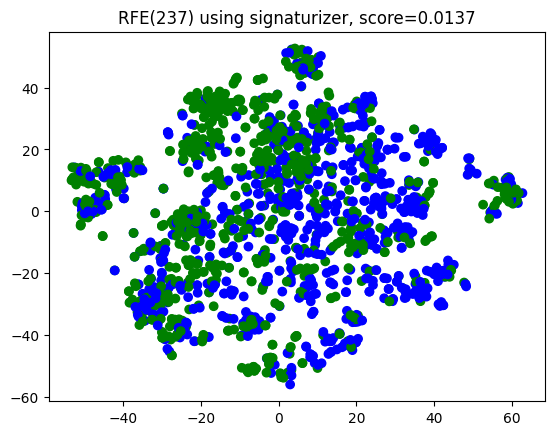

In [27]:
# Use t-SNE to reduce dimensionality of data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_train_filtered)
colors = ['blue', 'green']  # red for cluster 0, grey for cluster 1
cmap = ListedColormap(colors)

#plt.legend()

# Plot t-SNE reduced data points colored by cluster label
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train,cmap=cmap)
plt.title('RFE(237) using signaturizer, score=0.0137')
plt.show()

## RFC

In [28]:
#define random forest classifier
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(X_train_filtered,y_train)
end=datetime.datetime.now()

y_pred_train=forest.predict(X_train_filtered)
y_pred_test=forest.predict(X_test_filtered)
y_prediction_values_train=forest.predict_proba(X_train_filtered)
y_prediction_values_test=forest.predict_proba(X_test_filtered)

In [29]:
rfc_acc_train=accuracy_score(y_train,y_pred_train)*100
rfc_acc_test=accuracy_score(y_test,y_pred_test)*100
rfc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
rfc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
rfc_f1_train=f1_score(y_train, y_pred_train, average='macro')
rfc_f1_test=f1_score(y_test, y_pred_test, average='macro')
rfc_prec_train=precision_score(y_train, y_pred_train)
rfc_prec_test=precision_score(y_test, y_pred_test)
rfc_recall_train=recall_score(y_train, y_pred_train)
rfc_recall_test=recall_score(y_test, y_pred_test)
kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)
rfc_kappa_train=kappa_train
kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)
rfc_kappa_test=kappa_test

rfc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
rfc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[137  62]
 [ 73 154]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6524    0.6884    0.6699       199
           1     0.7130    0.6784    0.6953       227

    accuracy                         0.6831       426
   macro avg     0.6827    0.6834    0.6826       426
weighted avg     0.6847    0.6831    0.6834       426



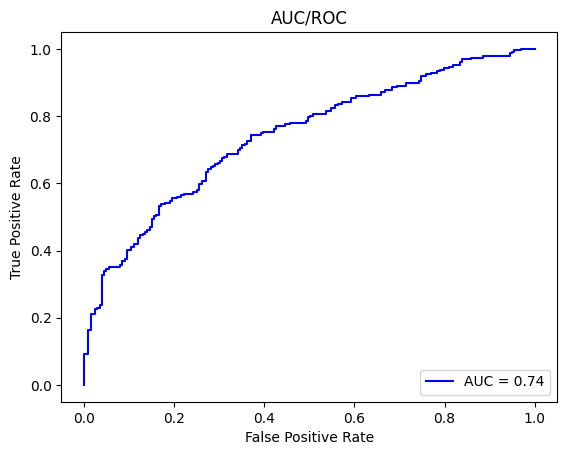

In [30]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_1=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train_filtered,y_train)
y_pred_test=KNN.predict(X_test_filtered)
y_pred_train=KNN.predict(X_train_filtered)


y_prediction_values_train=KNN.predict_proba(X_train_filtered)
y_prediction_values_test=KNN.predict_proba(X_test_filtered)


In [32]:
knn_acc_train=accuracy_score(y_train,y_pred_train)*100
knn_acc_test=accuracy_score(y_test,y_pred_test)*100
knn_mcc_train=matthews_corrcoef(y_train, y_pred_train)
knn_mcc_test=matthews_corrcoef(y_test, y_pred_test)
knn_f1_train=f1_score(y_train, y_pred_train, average='macro')
knn_f1_test=f1_score(y_test, y_pred_test, average='macro')
knn_prec_train=precision_score(y_train, y_pred_train)
knn_prec_test=precision_score(y_test, y_pred_test)
knn_recall_train=recall_score(y_train, y_pred_train)
knn_recall_test=recall_score(y_test, y_pred_test)
knn_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

knn_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

knn_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
knn_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[123  76]
 [ 70 157]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6373    0.6181    0.6276       199
           1     0.6738    0.6916    0.6826       227

    accuracy                         0.6573       426
   macro avg     0.6556    0.6549    0.6551       426
weighted avg     0.6568    0.6573    0.6569       426



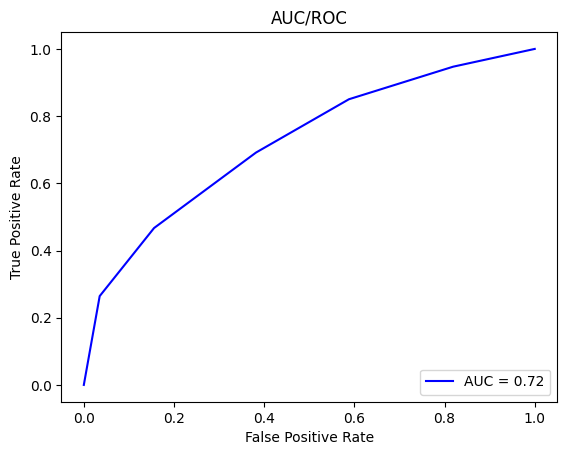

In [33]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_2=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# SVC

In [34]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train_filtered,y_train)
y_pred_test=model.predict(X_test_filtered)
y_pred_train=model.predict(X_train_filtered)

y_prediction_values_train=model.predict_proba(X_train_filtered)
y_prediction_values_test=model.predict_proba(X_test_filtered)

In [35]:
svc_acc_train=accuracy_score(y_train,y_pred_train)*100
svc_acc_test=accuracy_score(y_test,y_pred_test)*100
svc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
svc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
svc_f1_train=f1_score(y_train, y_pred_train, average='macro')
svc_f1_test=f1_score(y_test, y_pred_test, average='macro')
svc_prec_train=precision_score(y_train, y_pred_train)
svc_prec_test=precision_score(y_test, y_pred_test)
svc_recall_train=recall_score(y_train, y_pred_train)
svc_recall_test=recall_score(y_test, y_pred_test)
svc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

svc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


svc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
svc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[138  61]
 [ 64 163]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6832    0.6935    0.6883       199
           1     0.7277    0.7181    0.7228       227

    accuracy                         0.7066       426
   macro avg     0.7054    0.7058    0.7056       426
weighted avg     0.7069    0.7066    0.7067       426



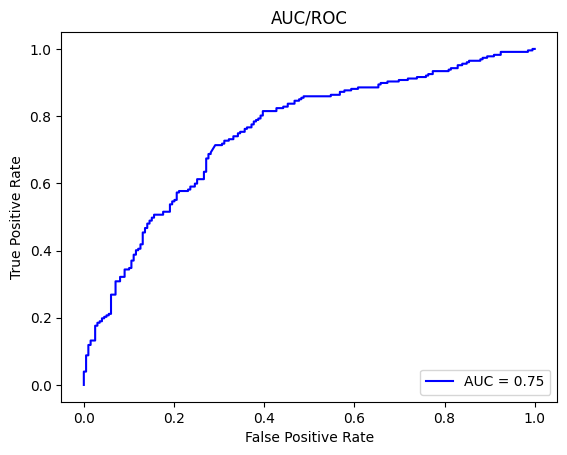

In [36]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_3=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_filtered,y_train)
y_pred_test=lr.predict(X_test_filtered)
y_pred_train=lr.predict(X_train_filtered)

y_prediction_values_train=lr.predict_proba(X_train_filtered)
y_prediction_values_test=lr.predict_proba(X_test_filtered)                                     

/home/ahujalab4/.conda/envs/asvm/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
lr_acc_train=accuracy_score(y_train,y_pred_train)*100
lr_acc_test=accuracy_score(y_test,y_pred_test)*100
lr_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lr_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lr_f1_train=f1_score(y_train, y_pred_train, average='macro')
lr_f1_test=f1_score(y_test, y_pred_test, average='macro')
lr_prec_train=precision_score(y_train, y_pred_train)
lr_prec_test=precision_score(y_test, y_pred_test)
lr_recall_train=recall_score(y_train, y_pred_train)
lr_recall_test=recall_score(y_test, y_pred_test)
lr_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lr_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

lr_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lr_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[127  72]
 [ 83 144]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6048    0.6382    0.6210       199
           1     0.6667    0.6344    0.6501       227

    accuracy                         0.6362       426
   macro avg     0.6357    0.6363    0.6356       426
weighted avg     0.6377    0.6362    0.6365       426



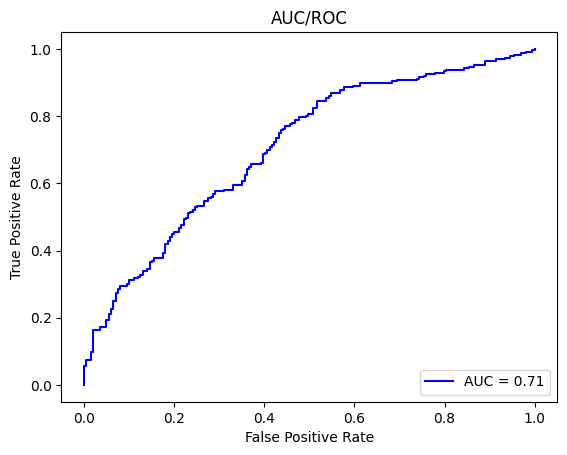

In [39]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_4=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

# XGB

In [40]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',silent=True, nthread=1)
xgb.fit(X_train_filtered, y_train)
y_pred_train = xgb.predict(X_train_filtered)
y_pred_test = xgb.predict(X_test_filtered)

y_prediction_values_train=xgb.predict_proba(X_train_filtered)
y_prediction_values_test=xgb.predict_proba(X_test_filtered)

[11:38:22] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [41]:
xgb_acc_train=accuracy_score(y_train,y_pred_train)*100
xgb_acc_test=accuracy_score(y_test,y_pred_test)*100
xgb_mcc_train=matthews_corrcoef(y_train, y_pred_train)
xgb_mcc_test=matthews_corrcoef(y_test, y_pred_test)
xgb_f1_train=f1_score(y_train, y_pred_train, average='macro')
xgb_f1_test=f1_score(y_test, y_pred_test, average='macro')
xgb_prec_train=precision_score(y_train, y_pred_train)
xgb_prec_test=precision_score(y_test, y_pred_test)
xgb_recall_train=recall_score(y_train, y_pred_train)
xgb_recall_test=recall_score(y_test, y_pred_test)

xgb_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

xgb_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)



xgb_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
xgb_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[129  70]
 [ 68 159]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6548    0.6482    0.6515       199
           1     0.6943    0.7004    0.6974       227

    accuracy                         0.6761       426
   macro avg     0.6746    0.6743    0.6744       426
weighted avg     0.6759    0.6761    0.6759       426



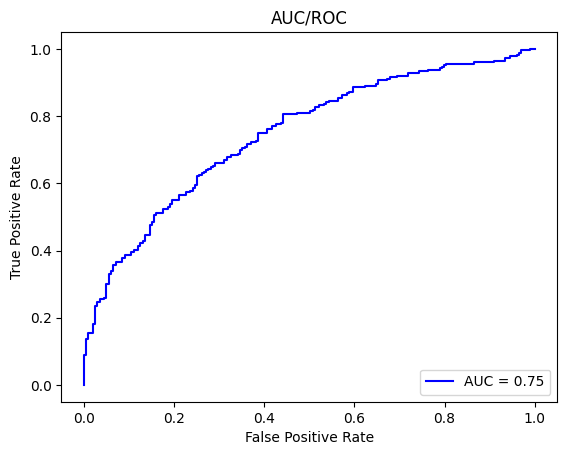

In [42]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_5=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Gaussian NB

In [43]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_filtered, y_train)

y_pred_train = clf.predict(X_train_filtered)
y_pred_test = clf.predict(X_test_filtered)
y_prediction_values_train=clf.predict_proba(X_train_filtered)
y_prediction_values_test=clf.predict_proba(X_test_filtered)

In [44]:
clf_acc_train=accuracy_score(y_train,y_pred_train)*100
clf_acc_test=accuracy_score(y_test,y_pred_test)*100
clf_mcc_train=matthews_corrcoef(y_train, y_pred_train)
clf_mcc_test=matthews_corrcoef(y_test, y_pred_test)
clf_f1_train=f1_score(y_train, y_pred_train, average='macro')
clf_f1_test=f1_score(y_test, y_pred_test, average='macro')
clf_prec_train=precision_score(y_train, y_pred_train)
clf_prec_test=precision_score(y_test, y_pred_test)
clf_recall_train=recall_score(y_train, y_pred_train)
clf_recall_test=recall_score(y_test, y_pred_test)
clf_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

clf_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

clf_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
clf_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])

print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[124  75]
 [ 75 152]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6231    0.6231    0.6231       199
           1     0.6696    0.6696    0.6696       227

    accuracy                         0.6479       426
   macro avg     0.6464    0.6464    0.6464       426
weighted avg     0.6479    0.6479    0.6479       426



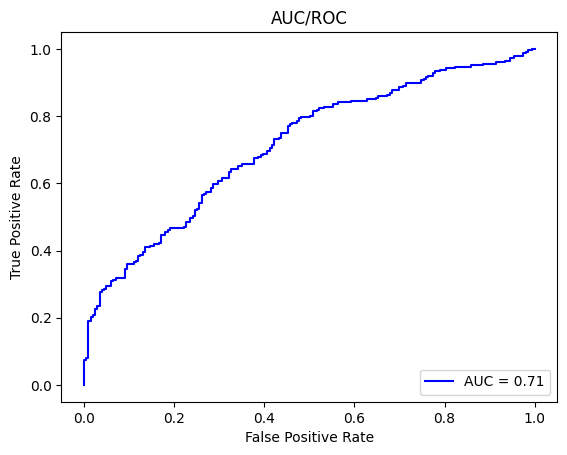

In [45]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_6=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## MLP

In [46]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp.fit(X_train_filtered, y_train)

y_pred_train = mlp.predict(X_train_filtered)
y_pred_test = mlp.predict(X_test_filtered)
y_prediction_values_train=mlp.predict_proba(X_train_filtered)
y_prediction_values_test=mlp.predict_proba(X_test_filtered)

In [47]:
mlp_acc_train=accuracy_score(y_train,y_pred_train)*100
mlp_acc_test=accuracy_score(y_test,y_pred_test)*100
mlp_mcc_train=matthews_corrcoef(y_train, y_pred_train)
mlp_mcc_test=matthews_corrcoef(y_test, y_pred_test)
mlp_f1_train=f1_score(y_train, y_pred_train, average='macro')
mlp_f1_test=f1_score(y_test, y_pred_test, average='macro')
mlp_prec_train=precision_score(y_train, y_pred_train)
mlp_prec_test=precision_score(y_test, y_pred_test)
mlp_recall_train=recall_score(y_train, y_pred_train)
mlp_recall_test=recall_score(y_test, y_pred_test)

mlp_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

mlp_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


mlp_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
mlp_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[142  57]
 [ 88 139]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6174    0.7136    0.6620       199
           1     0.7092    0.6123    0.6572       227

    accuracy                         0.6596       426
   macro avg     0.6633    0.6630    0.6596       426
weighted avg     0.6663    0.6596    0.6594       426



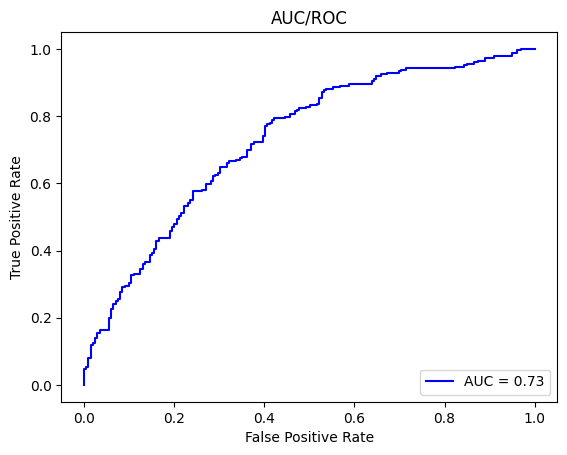

In [48]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_7=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Extratree classifier

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
etc.fit(X_train_filtered, y_train)


y_pred_train = etc.predict(X_train_filtered)
y_pred_test = etc.predict(X_test_filtered)
y_prediction_values_train=etc.predict_proba(X_train_filtered)
y_prediction_values_test=etc.predict_proba(X_test_filtered)

In [50]:
etc_acc_train=accuracy_score(y_train,y_pred_train)*100
etc_acc_test=accuracy_score(y_test,y_pred_test)*100
etc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
etc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
etc_f1_train=f1_score(y_train, y_pred_train, average='macro')
etc_f1_test=f1_score(y_test, y_pred_test, average='macro')
etc_prec_train=precision_score(y_train, y_pred_train)
etc_prec_test=precision_score(y_test, y_pred_test)
etc_recall_train=recall_score(y_train, y_pred_train)
etc_recall_test=recall_score(y_test, y_pred_test)

etc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

etc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

etc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
etc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])


print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[139  60]
 [ 67 160]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6748    0.6985    0.6864       199
           1     0.7273    0.7048    0.7159       227

    accuracy                         0.7019       426
   macro avg     0.7010    0.7017    0.7012       426
weighted avg     0.7027    0.7019    0.7021       426



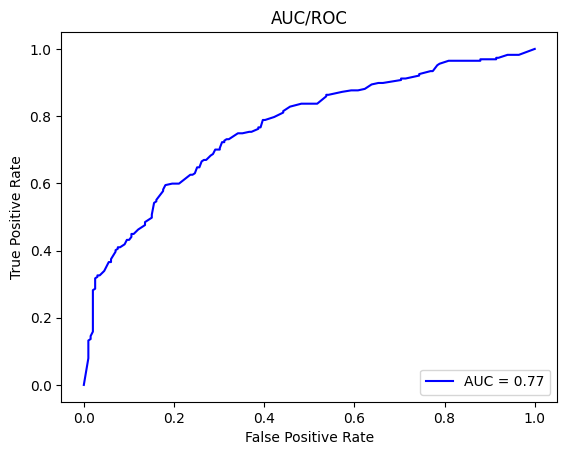

In [51]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_8=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## Decision Tree classifier

In [52]:
## Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)
dtc.fit(X_train_filtered, y_train)


y_pred_train = dtc.predict(X_train_filtered)
y_pred_test = dtc.predict(X_test_filtered)

y_prediction_values_train=dtc.predict_proba(X_train_filtered)
y_prediction_values_test=dtc.predict_proba(X_test_filtered)                           

In [53]:
dtc_acc_train=accuracy_score(y_train,y_pred_train)*100
dtc_acc_test=accuracy_score(y_test,y_pred_test)*100
dtc_mcc_train=matthews_corrcoef(y_train, y_pred_train)
dtc_mcc_test=matthews_corrcoef(y_test, y_pred_test)
dtc_f1_train=f1_score(y_train, y_pred_train, average='macro')
dtc_f1_test=f1_score(y_test, y_pred_test, average='macro')
dtc_prec_train=precision_score(y_train, y_pred_train)
dtc_prec_test=precision_score(y_test, y_pred_test)
dtc_recall_train=recall_score(y_train, y_pred_train)
dtc_recall_test=recall_score(y_test, y_pred_test)

dtc_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

dtc_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)

dtc_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
dtc_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[114  85]
 [ 82 145]]
Classification Report:
               precision    recall  f1-score   support

           0     0.5816    0.5729    0.5772       199
           1     0.6304    0.6388    0.6346       227

    accuracy                         0.6080       426
   macro avg     0.6060    0.6058    0.6059       426
weighted avg     0.6076    0.6080    0.6078       426



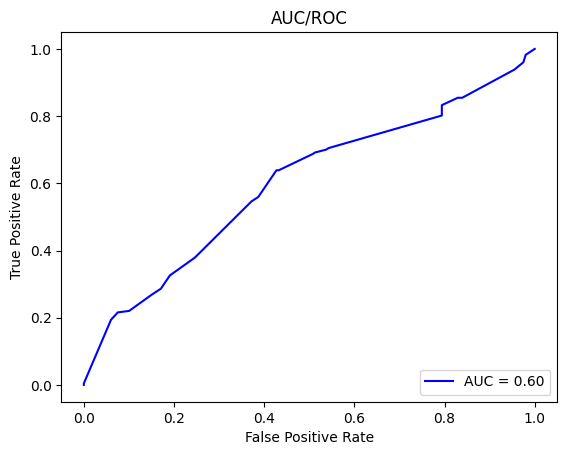

In [54]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_9=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

## LDA

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_filtered, y_train)


y_pred_train =lda.predict(X_train_filtered)
y_pred_test = lda.predict(X_test_filtered)

y_prediction_values_train=lda.predict_proba(X_train_filtered)
y_prediction_values_test=lda.predict_proba(X_test_filtered)
                                                        

In [56]:
lda_acc_train=accuracy_score(y_train,y_pred_train)*100
lda_acc_test=accuracy_score(y_test,y_pred_test)*100
lda_mcc_train=matthews_corrcoef(y_train, y_pred_train)
lda_mcc_test=matthews_corrcoef(y_test, y_pred_test)
lda_f1_train=f1_score(y_train, y_pred_train, average='macro')
lda_f1_test=f1_score(y_test, y_pred_test, average='macro')
lda_prec_train=precision_score(y_train, y_pred_train)
lda_prec_test=precision_score(y_test, y_pred_test)
lda_recall_train=recall_score(y_train, y_pred_train)
lda_recall_test=recall_score(y_test, y_pred_test)

lda_kappa_train=sklearn.metrics.cohen_kappa_score(y_train,y_pred_train)

lda_kappa_test=sklearn.metrics.cohen_kappa_score(y_test,y_pred_test)


lda_auc_train=roc_auc_score(y_train,y_prediction_values_train[:, 1])
lda_auc_test=roc_auc_score(y_test,y_prediction_values_test[:, 1])
print("confusion matrix\n",confusion_matrix(y_test,y_pred_test))
print("Classification Report:\n",classification_report(y_test,y_pred_test,digits=4))

confusion matrix
 [[128  71]
 [ 84 143]]
Classification Report:
               precision    recall  f1-score   support

           0     0.6038    0.6432    0.6229       199
           1     0.6682    0.6300    0.6485       227

    accuracy                         0.6362       426
   macro avg     0.6360    0.6366    0.6357       426
weighted avg     0.6381    0.6362    0.6365       426



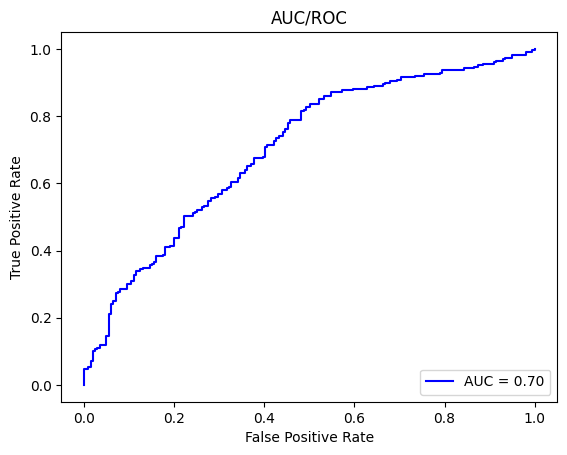

In [57]:
#auc
fpr, tpr, _ = roc_curve(y_test,y_prediction_values_test[:, 1])
roc_auc = auc(fpr, tpr)
auc_10=roc_auc

#
figcount=0
Figureset=[]
image=plt.figure(figcount)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.title("AUC/ROC")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AUC/ROC")
plt.legend(loc="lower right")
figcount+=1
Figureset.append(image)
plt.show()

In [58]:
data_train = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
         'Accuracy_train':[rfc_acc_train,knn_acc_train,svc_acc_train,lr_acc_train,xgb_acc_train,clf_acc_train,mlp_acc_train,etc_acc_train,dtc_acc_train,lda_acc_train],
       'MCC Score_train':[rfc_mcc_train,knn_mcc_train,svc_mcc_train,lr_mcc_train,xgb_mcc_train,clf_mcc_train,mlp_mcc_train,etc_mcc_train,dtc_mcc_train,lda_mcc_train],
       'F1 Score_train':[rfc_f1_train,knn_f1_train,svc_f1_train,lr_f1_train,xgb_f1_train,clf_f1_train,mlp_f1_train,etc_f1_train,dtc_f1_train,lda_f1_train],
       'Precision_train':[rfc_prec_train,knn_prec_train,svc_prec_train,lr_prec_train,xgb_prec_train,clf_prec_train,mlp_prec_train,etc_prec_train,dtc_prec_train,lda_prec_train],
       'Recall_train':[rfc_recall_train,knn_recall_train,svc_recall_train,lr_recall_train,xgb_recall_train,clf_recall_train,mlp_recall_train,etc_recall_train,dtc_recall_train,lda_recall_train],
         'kappa Score_train':[rfc_kappa_train,knn_kappa_train,svc_kappa_train,lr_kappa_train,xgb_kappa_train,clf_kappa_train,mlp_kappa_train,etc_kappa_train,dtc_kappa_train,lda_kappa_train],
       'AUC/ROC_train':[rfc_auc_train,knn_auc_train,svc_auc_train,lr_auc_train,xgb_auc_train,clf_auc_train,mlp_auc_train,etc_auc_train,dtc_auc_train,lda_auc_train]}
df_train = pd.DataFrame(data_train)

In [59]:
data_test = {'Model': ['RFC','KNN','SVC','LR','XGB','GNB','MLP','ETC','DTC','LDA'],
             'Accuracy_test': [rfc_acc_test,knn_acc_test,svc_acc_test,lr_acc_test,xgb_acc_test,clf_acc_test,mlp_acc_test,etc_acc_test,dtc_acc_test,lda_acc_test],
             'MCC Score_test':[rfc_mcc_test,knn_mcc_test,svc_mcc_test,lr_mcc_test,xgb_mcc_test,clf_mcc_test,mlp_mcc_test,etc_mcc_test,dtc_mcc_test,lda_mcc_test],
              'F1 Score_test':[rfc_f1_test,knn_f1_test,svc_f1_test,lr_f1_test,xgb_f1_test,clf_f1_test,mlp_f1_test,etc_f1_test,dtc_f1_test,lda_f1_test],
               'Precision_test':[rfc_prec_test,knn_prec_test,svc_prec_test,lr_prec_test,xgb_prec_test,clf_prec_test,mlp_prec_test,etc_prec_test,dtc_prec_test,lda_prec_test],
             'Recall_test':[rfc_recall_test,knn_recall_test,svc_recall_test,lr_recall_test,xgb_recall_test,clf_recall_test,mlp_recall_test,etc_recall_test,dtc_recall_test,lda_recall_test],
              'kappa Score_test':[rfc_kappa_test,knn_kappa_test,svc_kappa_test,lr_kappa_test,xgb_kappa_test,clf_kappa_test,mlp_kappa_test,etc_kappa_test,dtc_kappa_test,lda_kappa_test],
               'AUC/ROC_test':[rfc_auc_test,knn_auc_test,svc_auc_test,lr_auc_test,xgb_auc_test,clf_auc_test,mlp_auc_test,etc_auc_test,dtc_auc_test,lda_auc_test]}
             
df_test = pd.DataFrame(data_test)             

In [60]:
df_train

,Model,Accuracy_train,MCC Score_train,F1 Score_train,Precision_train,Recall_train,kappa Score_train,AUC/ROC_train
0,RFC,83.852026,0.676705,0.838345,0.841270,0.846066,0.676694,0.924920
1,KNN,80.739871,0.614729,0.806772,0.797400,0.839225,0.613826,0.887480
2,SVC,87.962419,0.759325,0.879331,0.869231,0.901938,0.758752,0.950748
3,LR,76.159718,0.522590,0.761228,0.763718,0.777651,0.522497,0.851225
4,XGB,99.706400,0.994128,0.997061,0.995455,0.998860,0.994122,0.999978
5,GNB,67.997651,0.358867,0.678999,0.680435,0.713797,0.358407,0.741559
6,MLP,99.588961,0.991779,0.995886,0.997712,0.994299,0.991773,0.999974
7,ETC,99.706400,0.994124,0.997061,0.997717,0.996579,0.994123,0.999979
8,DTC,76.805637,0.535651,0.767823,0.773864,0.776511,0.535647,0.842601
9,LDA,77.157957,0.542678,0.771332,0.776644,0.781072,0.542669,0.853293


In [61]:
df_test

,Model,Accuracy_test,MCC Score_test,F1 Score_test,Precision_test,Recall_test,kappa Score_test,AUC/ROC_test
0,RFC,68.309859,0.366099,0.682593,0.712963,0.678414,0.365610,0.740287
1,KNN,65.727700,0.310422,0.655080,0.673820,0.691630,0.310297,0.722434
2,SVC,70.657277,0.411188,0.705559,0.727679,0.718062,0.411147,0.751754
3,LR,63.615023,0.271990,0.635570,0.666667,0.634361,0.271626,0.705311
4,XGB,67.605634,0.348914,0.674442,0.694323,0.700441,0.348898,0.745600
5,GNB,64.788732,0.292719,0.646360,0.669604,0.669604,0.292719,0.712284
6,MLP,65.962441,0.326239,0.659608,0.709184,0.612335,0.322801,0.728754
7,ETC,70.187793,0.402684,0.701152,0.727273,0.704846,0.402465,0.767306
8,DTC,60.798122,0.211849,0.605894,0.630435,0.638767,0.211828,0.601277
9,LDA,63.615023,0.272584,0.635699,0.668224,0.629956,0.272076,0.702964
